In [1]:
import laspy
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input_las_path = "/home/chazelam/Code/LiDAR/data/test_data/non_ground.las"
voxel_sizes = [0.1, 0.2, 0.5, 1.0]

print("Loading LAS...")
las = laspy.read(input_las_path)
points = np.vstack((las.x, las.y, las.z)).T.astype(np.float32)

N = las.header.point_count
print(f"{N} points loaded.")

mins = points.min(axis=0)

Loading LAS...
13980406 points loaded.


In [3]:
def points_per_voxel(points, voxel_size, mins):
    voxel_idx = np.floor((points - mins) / voxel_size).astype(np.int32)
    _, counts = np.unique(voxel_idx, axis=0, return_counts=True)
    return counts

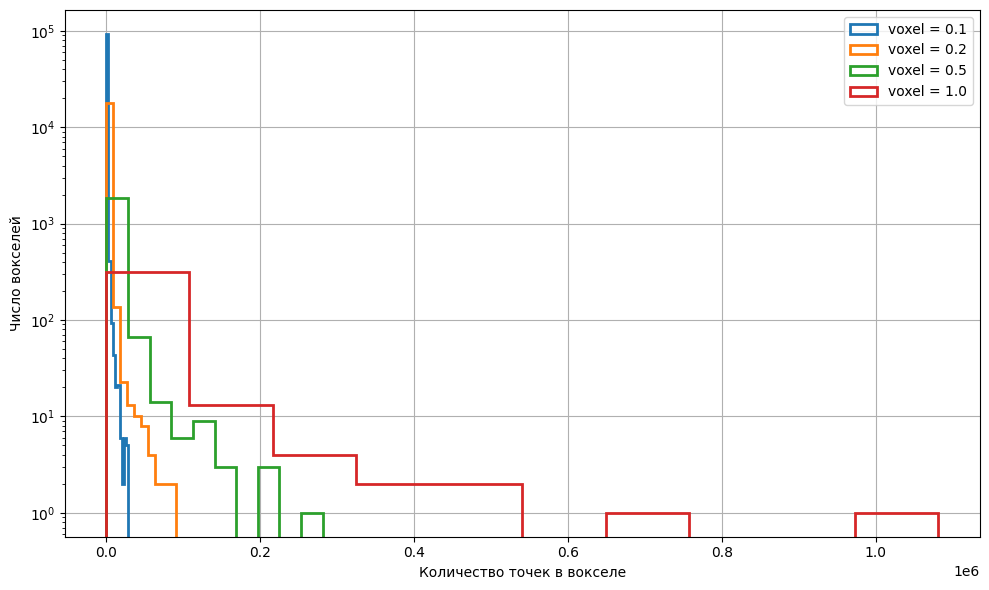

In [8]:
plt.figure(figsize=(10, 6))

# max_points = 200  # ограничиваем хвост (иначе лог шкала обязательна)
# bins = np.arange(1, max_points + 2)

for vs in voxel_sizes:
    counts = points_per_voxel(points, vs, mins)

    # counts = counts[counts <= max_points]  # защита от длинного хвоста
    plt.hist(
        counts,
        # bins=bins,
        histtype="step",
        linewidth=2,
        label=f"voxel = {vs}"
    )

plt.yscale("log")  # почти всегда нужно
plt.xlabel("Количество точек в вокселе")
plt.ylabel("Число вокселей")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


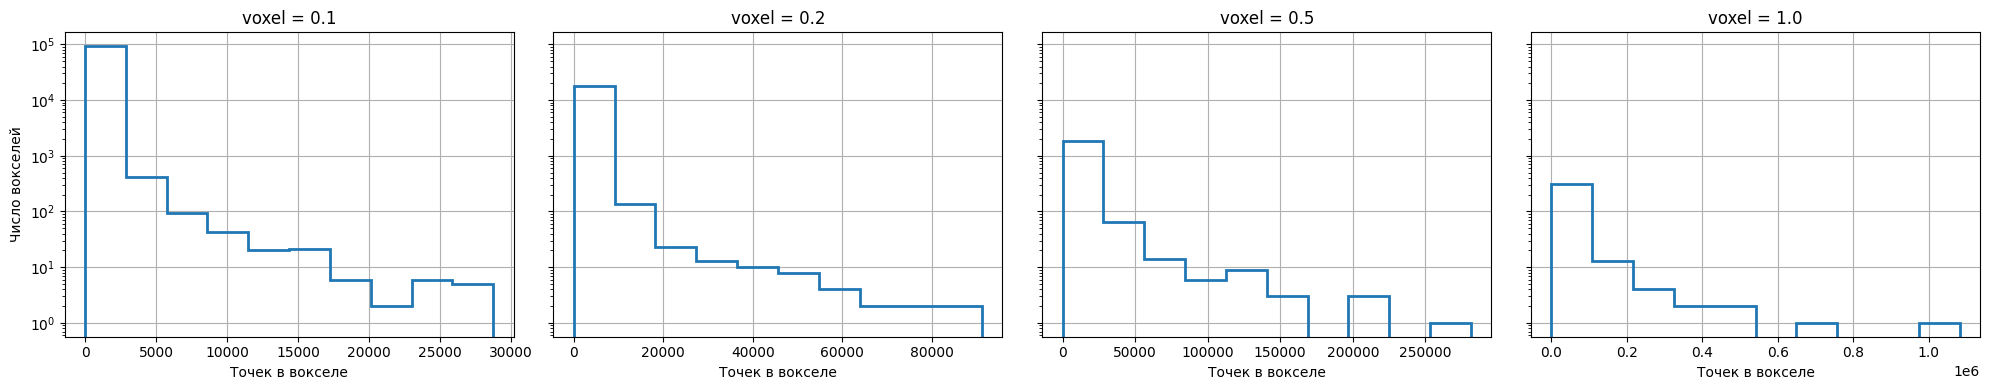

In [5]:
import matplotlib.pyplot as plt
import numpy as np

max_points = 200
bins = np.arange(1, max_points + 2)

fig, axes = plt.subplots(
    1, len(voxel_sizes),
    figsize=(5 * len(voxel_sizes), 4),
    sharey=True
)

if len(voxel_sizes) == 1:
    axes = [axes]

for ax, vs in zip(axes, voxel_sizes):
    counts = points_per_voxel(points, vs, mins)
    # counts = counts[counts <= max_points]

    ax.hist(
        counts,
        # bins=bins,
        histtype="step",
        linewidth=2
    )

    ax.set_title(f"voxel = {vs}")
    ax.set_xlabel("Точек в вокселе")
    ax.grid(True)

axes[0].set_ylabel("Число вокселей")
axes[0].set_yscale("log")

plt.tight_layout()
plt.show()
